In [1]:
import os
os.chdir('../')
import pandas as pd

data = pd.read_csv('Datasets/analysis_data.csv')

In [2]:
missing_columns=['education_level','online_shopping_freq','utility_payment_count']

eda=data[missing_columns]

data['education_level'].fillna(data['education_level'].mode()[0],inplace=True)
data['online_shopping_freq'].fillna(data['online_shopping_freq'].median(),inplace=True)
data['utility_payment_count'].fillna(data['utility_payment_count'].median(),inplace=True)

C:\Users\athar\AppData\Local\Temp\ipykernel_30536\2724879570.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education_level'].fillna(data['education_level'].mode()[0],inplace=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_30536\2724879570.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [4]:
X_train = data.drop(labels='monthly_spend',axis=1)
y = data.monthly_spend
categorical_variables=['gender','marital_status','education_level','region','employment_status','card_type']
X= pd.get_dummies(X_train, 
                         prefix_sep = '_', 
                         columns = categorical_variables, 
                         drop_first = True)

In [5]:
# EDA

data.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'education_level',
       'region', 'employment_status', 'owns_home', 'has_auto_loan',
       'annual_income', 'credit_score', 'credit_limit', 'tenure', 'card_type',
       'num_transactions', 'avg_transaction_value', 'online_shopping_freq',
       'reward_points_balance', 'travel_frequency', 'utility_payment_count',
       'num_children', 'num_credit_cards', 'monthly_spend'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def dist(variable):
    plt.figure(figsize=(8,5))
    sns.kdeplot(variable, fill=True, color='skyblue')
    # plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {variable.columns[0]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Lets use the backward pass algorithm and variables that it used for further analysis for Multiple linear Regression mkdel.

In [3]:
#
list_of_variables_from_submission3=['owns_home',
 'has_auto_loan',
 'credit_score',
 'credit_limit',
 'tenure',
 'num_transactions',
 'avg_transaction_value',
 'online_shopping_freq',
 'reward_points_balance',
 'travel_frequency',
 'utility_payment_count',
 'num_children',
 'num_credit_cards',
 'gender_male',
 'marital_status_single',
 'education_level_graduate',
 'education_level_high school',
 'region_northeast',
 'region_south',
 'region_west',
 'employment_status_self-employed',
 'employment_status_student',
 'employment_status_unemployed',
 'card_type_platinum',
 'card_type_standard']
numeric_variables=data[['credit_score','credit_limit','tenure','num_transactions','avg_transaction_value',
                        'online_shopping_freq','reward_points_balance','travel_frequency','utility_payment_count',
                        'num_credit_cards','num_children']]

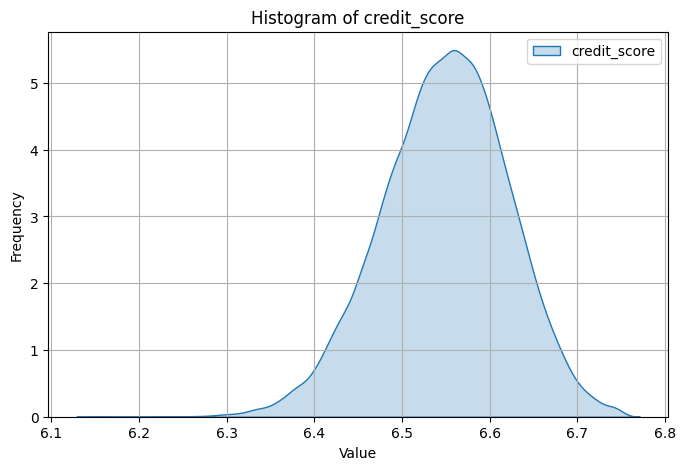

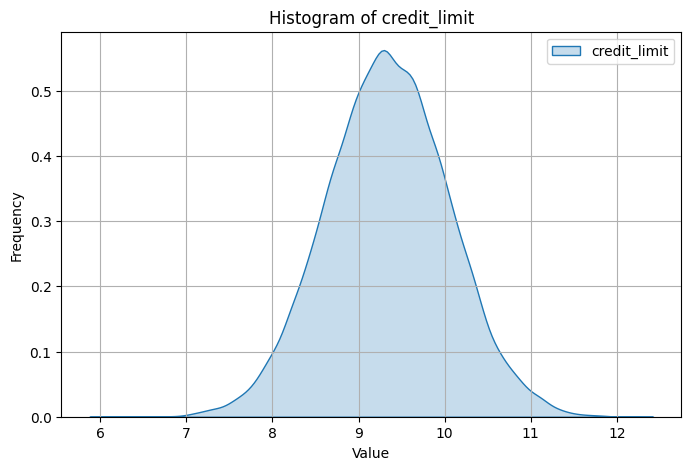

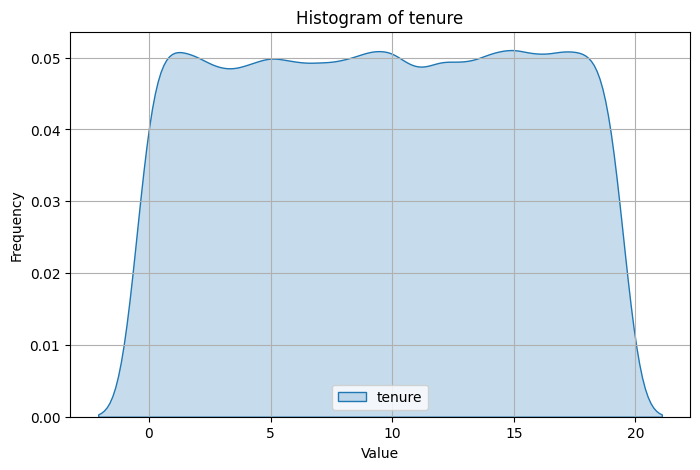

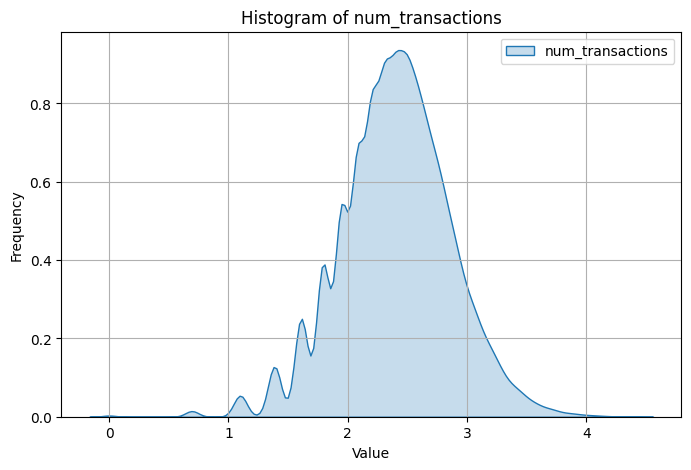

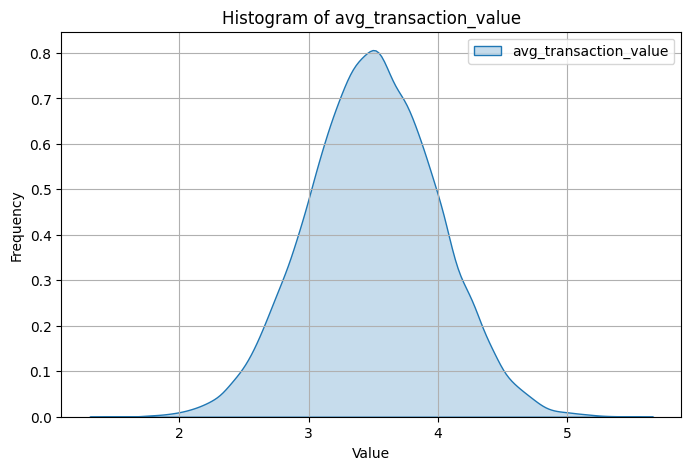

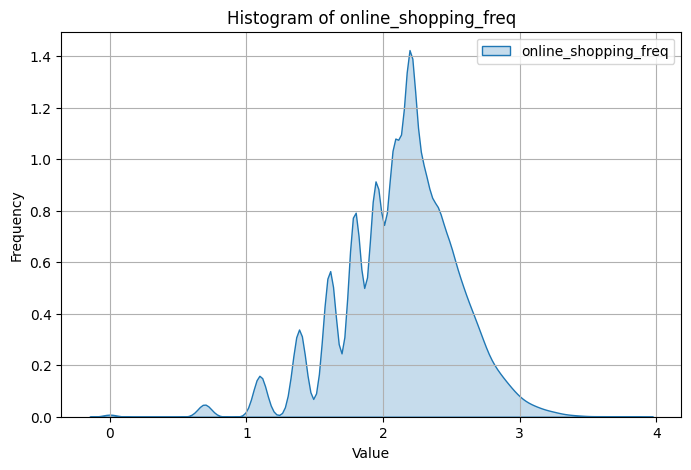

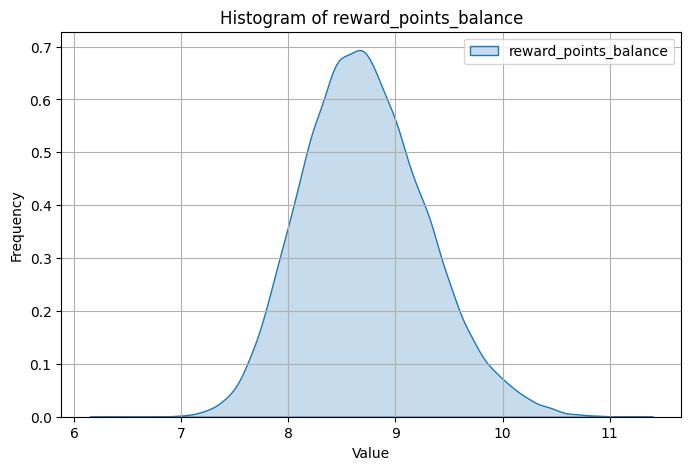

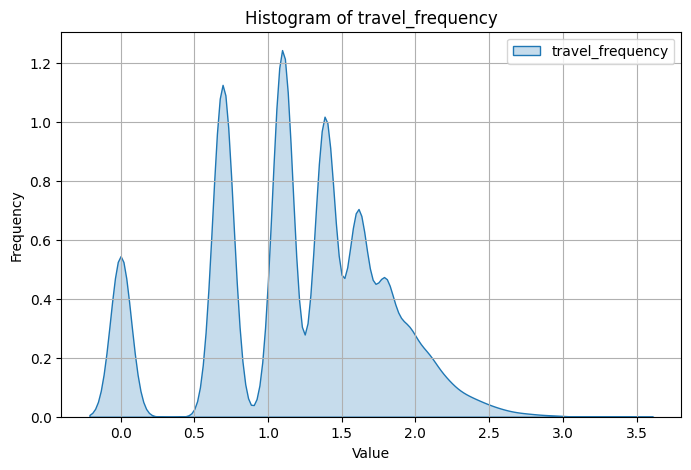

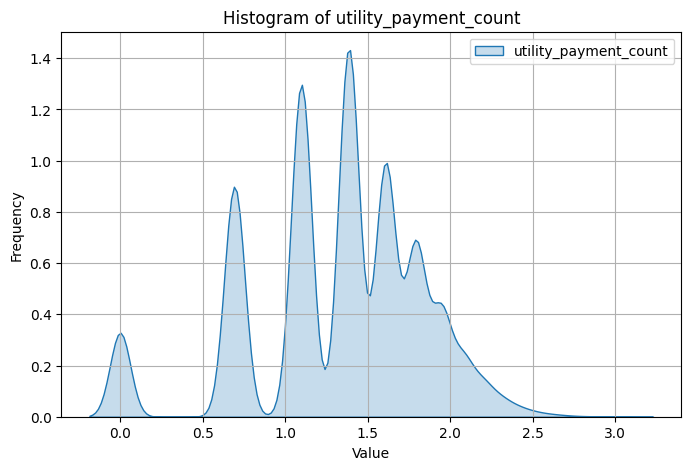

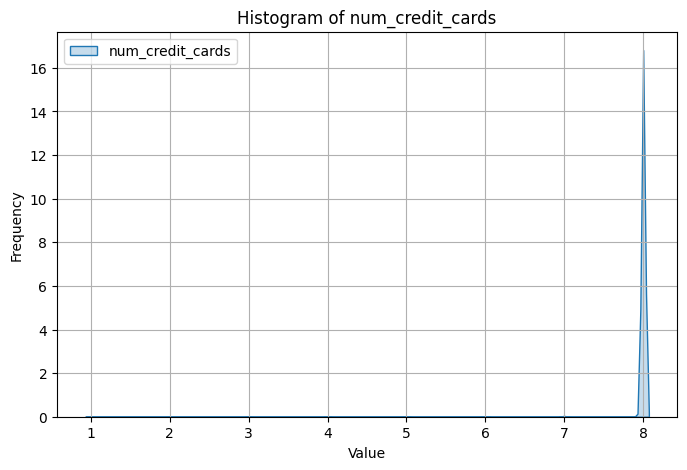

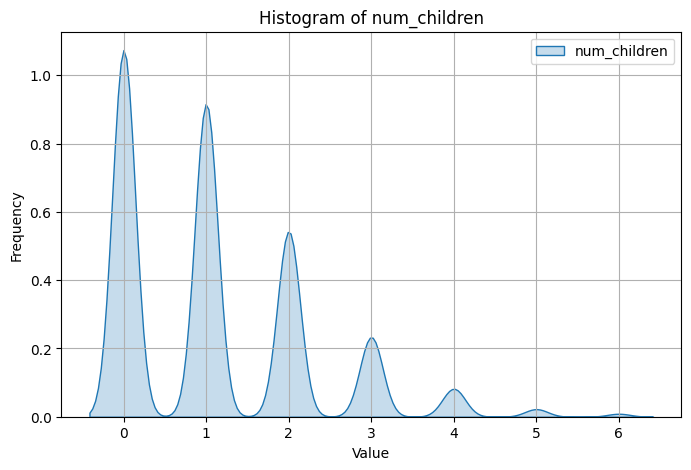

In [78]:
for variable in numeric_variables:
    dist(data[[variable]])

In [ ]:
# Remove customer id column
# Age is uniformly represented, check correlation with y and then check for multicollinearity.
# Owns home and has loan are categporical variables.
# Annual income is right skewed.
# Credit score is bell shaped check for normality.
# Credit limit is right skewed.
# Tenure follows a uniform distribution hence check multicollinearity and correlation with y
# All other variables are right skewed.
# num children is a categorical variable.
# Number of credit cards is a weird variable with majority values having 8 credit cards. check its correlation and multicollinearity. Use pandas to check average values across cards.
# Monthly spend is also right skewed.



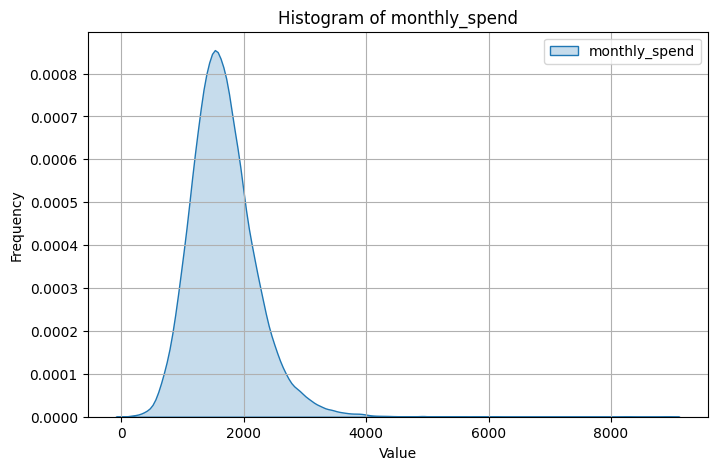

In [11]:
# CHeck distribution of Monthly Spend
dist(data[['monthly_spend']])

In [ ]:
# Check skewness and kutosis 
from scipy.stats import skew, kurtosis

print('Skewness: ',skew(data[['monthly_spend']]))
print('Kurtosis: ',kurtosis(data[['monthly_spend']]))


Skewness:  [1.05176838]
Kurtosis:  [3.9564044]


# Skewness and kurtosis of numeric variables

In [24]:
def skewKurt(variable):
    print('--------------------------------------------')
    print(data[[variable]].columns[0])
    print('Skewness: ',skew(data[[variable]]))
    print('Kurtosis: ',kurtosis(data[[variable]]))
    print('---------------------------------------------')


In [79]:
for variable in list(numeric_variables.columns):
    skewKurt(variable)

--------------------------------------------
credit_score
Skewness:  [-0.22170266]
Kurtosis:  [0.05229097]
---------------------------------------------
--------------------------------------------
credit_limit
Skewness:  [-0.00880717]
Kurtosis:  [0.01973172]
---------------------------------------------
--------------------------------------------
tenure
Skewness:  [-0.00903617]
Kurtosis:  [-1.2113545]
---------------------------------------------
--------------------------------------------
num_transactions
Skewness:  [-0.11783995]
Kurtosis:  [0.78755536]
---------------------------------------------
--------------------------------------------
avg_transaction_value
Skewness:  [0.0064753]
Kurtosis:  [0.02399786]
---------------------------------------------
--------------------------------------------
online_shopping_freq
Skewness:  [-0.46451053]
Kurtosis:  [1.24792144]
---------------------------------------------
--------------------------------------------
reward_points_balance
Sk

Most of the variables are right skewed hence transform them using natural logarithmic transformation to brimng in normality.
Inspect num_credit_cards as it is extremely right skewed.

In [30]:
(data['num_credit_cards'].value_counts()/len(data))*100

num_credit_cards
8    99.4450
7     0.2400
6     0.1225
5     0.0875
4     0.0600
3     0.0300
1     0.0075
2     0.0075
Name: count, dtype: float64

In [ ]:
data.groupby(by='num_credit_cards',as_index=False).agg(
    {'monthly_spend':'mean',}
)

,num_credit_cards,monthly_spend
0,1,890.276667
1,2,1099.110000
2,3,904.515833
3,4,1345.289583
4,5,1176.239429
5,6,1286.580408
6,7,1320.710729
7,8,1668.458745


In [33]:
data[['monthly_spend','num_credit_cards']].corr()

,monthly_spend,num_credit_cards
monthly_spend,1.000000,0.053316
num_credit_cards,0.053316,1.000000


In [34]:
from statsmodels.formula.api import ols

model=ols('monthly_spend ~ num_credit_cards',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthly_spend   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     114.0
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.40e-26
Time:                        14:12:52   Log-Likelihood:            -3.0816e+05
No. Observations:               40000   AIC:                         6.163e+05
Df Residuals:                   39998   BIC:                         6.163e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          499.9969    109.247      4.577      0.000     285.869     714.124
num_credit_cards   146.0010     13.673     10.678      0.000     119.202     172.800
==============================================================================
Omnibus:                     8750.854   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33688.542
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                       6.972   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='num_credit_cards', ylabel='monthly_spend'>

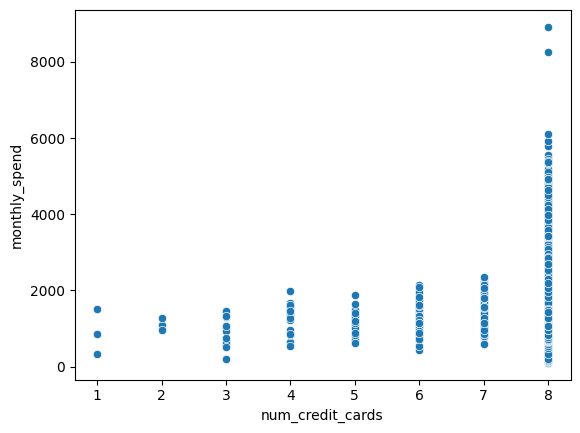

In [35]:
import seaborn as sns

sns.scatterplot(data=data,x='num_credit_cards',y='monthly_spend')

There is not a linear relationship between num_Credit_cards and monthly spend so we can imporve it .
Either apply log transformation to the y (monthly_spend) variable to make the prices much closer across cards. Even the y variable is right skewed so that might help.
The second solution is bin the credit cards into two categoris(1-7 and 8) and then one hot encode the variable.
lets first try using variables as it is with log transformation on other variables.

In [83]:
log_tanform_variables=['credit_limit','reward_points_balance','num_transactions','avg_transaction_value',
                       'travel_frequency','online_shopping_freq','utility_payment_count','num_children']

If the variable has 0 in it use ln(x+1) otherwise use ln(x)

In [ ]:
import numpy as np

data['credit_limit']=np.log(data['credit_limit'])
data['reward_points_balance']=np.log(data['reward_points_balance'])
data['num_transactions']=np.log(data['num_transactions']+1)
data['avg_transaction_value']=np.log(data['avg_transaction_value'])
data['travel_frequency']=np.log(data['travel_frequency']+1)
data['online_shopping_freq']=np.log(data['online_shopping_freq']+1)
data['utility_payment_count']=np.log(data['utility_payment_count']+1)


count    40000.000000
mean         1.324186
std          0.516595
min          0.000000
25%          1.098612
50%          1.386294
75%          1.609438
max          3.044522
Name: utility_payment_count, dtype: float64

In [81]:
skew(data['num_children'])

0.18589648563255262

Lets check the distributions again for transformed variables

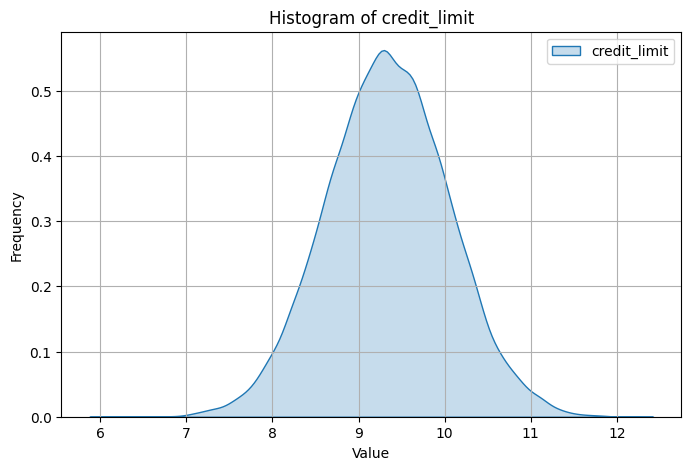

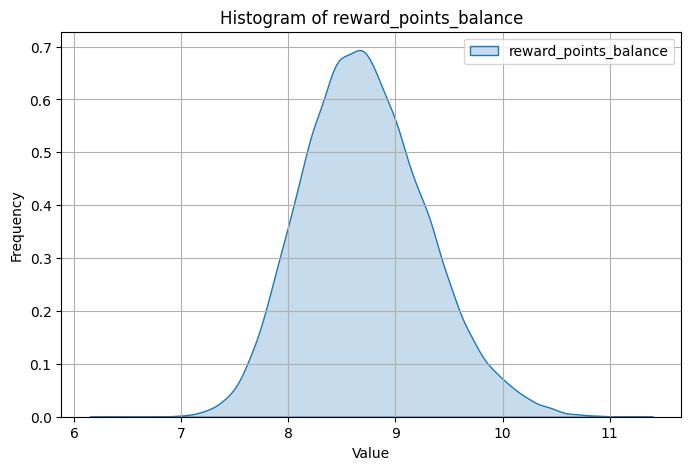

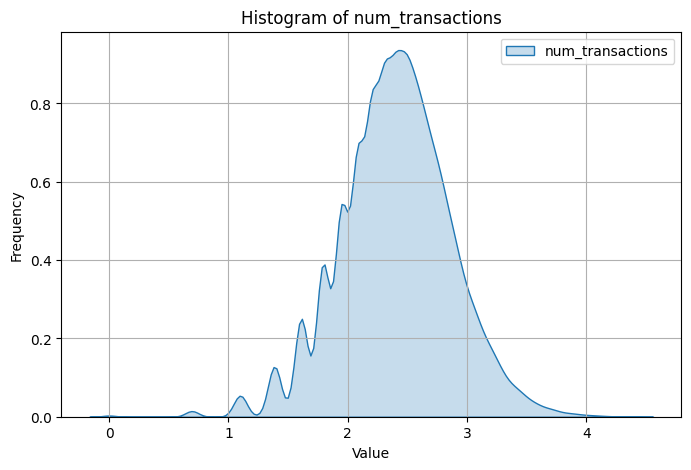

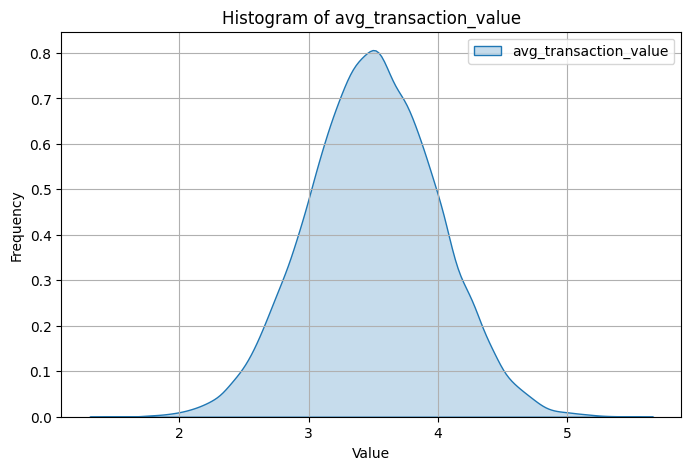

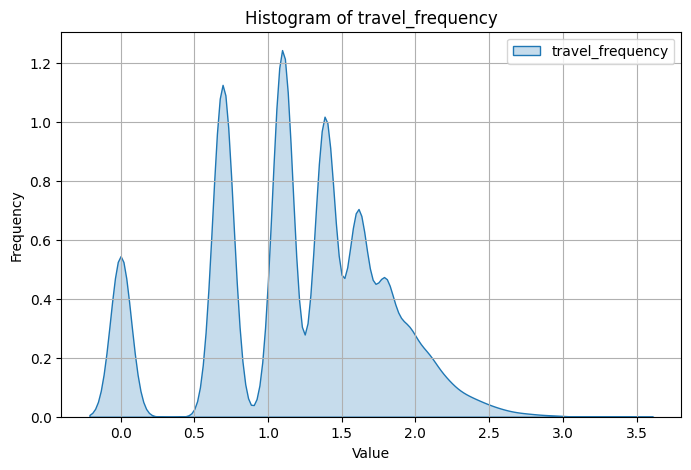

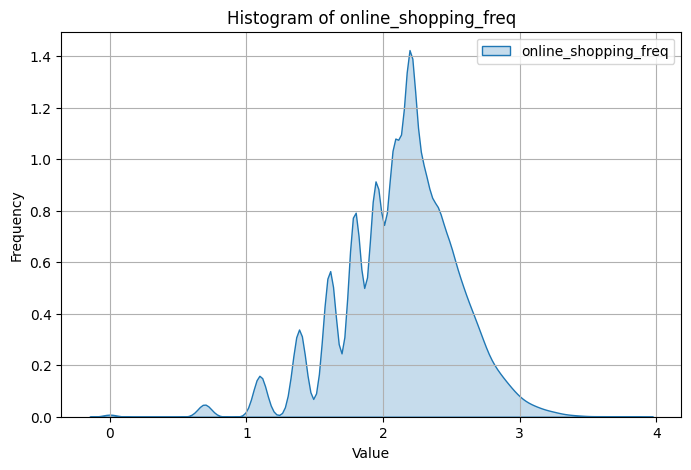

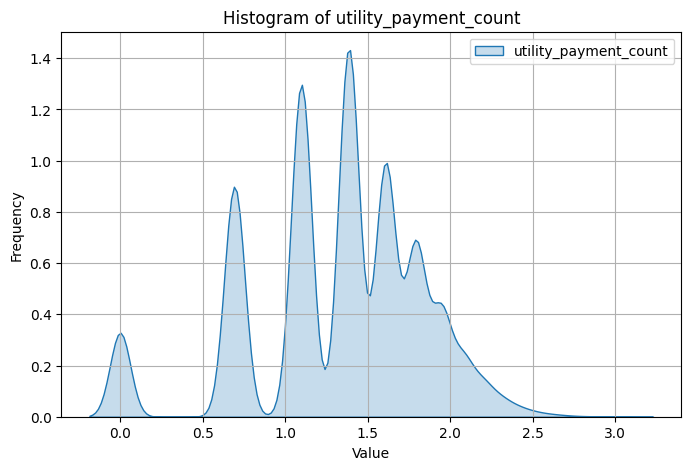

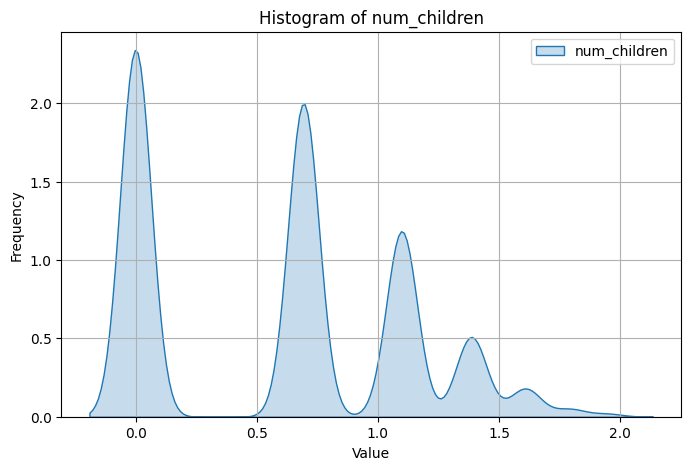

In [84]:
for variable in log_tanform_variables:
    dist(data[[variable]])

The data is normalized hence we can use these variables for modelling. 
The num_children variable isn't doing well lets examine its relationship with the dependent variable and then either remove the collumn or one hot encode it. But the variable is related hence lets use it directly.

In [5]:
from statsmodels.formula.api import ols

model=ols('monthly_spend ~ num_children',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthly_spend   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     6245.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:18:03   Log-Likelihood:            -3.0532e+05
No. Observations:               40000   AIC:                         6.106e+05
Df Residuals:                   39998   BIC:                         6.107e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1476.2285      3.467    425.764      0.000    1469.433    1483.024
num_children   171.2858      2.167     79.026      0.000     167.037     175.534
==============================================================================
Omnibus:                    10876.828   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50933.622
Skew:                           1.251   Prob(JB):                         0.00
Kurtosis:                       7.929   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It is useful hence lets try using it, as the transformation isn't doing anything we use the variable as it is.

# Categorical EDA

In [73]:
data.select_dtypes('object')

,gender,marital_status,education_level,region,employment_status,card_type
0,female,married,high school,northeast,unemployed,standard
1,male,married,high school,south,unemployed,gold
2,female,married,bachelors,west,unemployed,standard
3,female,married,high school,northeast,unemployed,standard
4,female,single,bachelors,west,self-employed,standard
...,...,...,...,...,...,...
39995,female,married,bachelors,northeast,unemployed,standard
39996,female,single,bachelors,northeast,student,gold
39997,male,married,high school,west,unemployed,standard
39998,female,married,bachelors,west,unemployed,standard


In [76]:
# All of them were used
data

,customer_id,age,gender,marital_status,education_level,region,employment_status,owns_home,has_auto_loan,annual_income,...,card_type,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards,monthly_spend
0,75570383,77,female,married,high school,northeast,unemployed,1,0,56000.116893,...,standard,2.708050,3.831788,2.197225,8.752357,1.386294,1.386294,1,8,1682.86
1,77915507,52,male,married,high school,south,unemployed,1,1,39432.589311,...,gold,2.639057,4.483367,2.079442,8.628164,0.693147,0.693147,2,8,2135.57
2,31958910,48,female,married,bachelors,west,unemployed,1,1,51020.949673,...,standard,2.302585,4.360604,1.609438,8.740373,1.386294,1.098612,0,8,1540.61
3,76868487,67,female,married,high school,northeast,unemployed,1,0,76794.566399,...,standard,2.397895,4.006108,2.079442,9.091040,1.386294,1.386294,2,8,1250.86
4,69435006,21,female,single,bachelors,west,self-employed,1,1,44386.444631,...,standard,2.197225,2.937399,1.945910,8.578857,1.609438,1.386294,0,8,915.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,61684274,76,female,married,bachelors,northeast,unemployed,1,0,24416.053251,...,standard,2.564949,2.996775,1.945910,8.179321,1.386294,0.693147,2,8,1513.39
39996,79543996,35,female,single,bachelors,northeast,student,1,0,117569.490084,...,gold,2.944439,3.167305,2.302585,9.510767,1.098612,1.609438,0,8,1476.55
39997,70938074,70,male,married,high school,west,unemployed,1,1,54612.784494,...,standard,2.564949,4.272903,1.945910,8.794527,0.000000,1.609438,1,8,2073.80
39998,87140605,59,female,married,bachelors,west,unemployed,1,1,25765.665767,...,standard,2.484907,3.598444,1.609438,8.284968,0.693147,1.098612,1,8,1431.06


In [ ]:
Categorical_variables_used=[]

In [28]:
# Categorical EDA.
data.select_dtypes('object').columns

Index(['gender', 'marital_status', 'education_level', 'region',
       'employment_status', 'card_type'],
      dtype='object')

In [32]:
def bplot(df, col_name):
    # Pass the column name as the title/label directly
    
    plt.figure(figsize=(6, 4))
    
    # Use col_name (string) for plotting
    sns.countplot(
        data=df,
        y=col_name,
        order=df[col_name].value_counts().index,
        palette='viridis'
    )

    # Corrected usage: using col_name directly for title and ylabel
    plt.title(f'Distribution of {col_name}', fontsize=16)
    plt.xlabel('Count (Absolute Frequency)', fontsize=12)
    plt.ylabel(col_name, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_9352\3968175802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


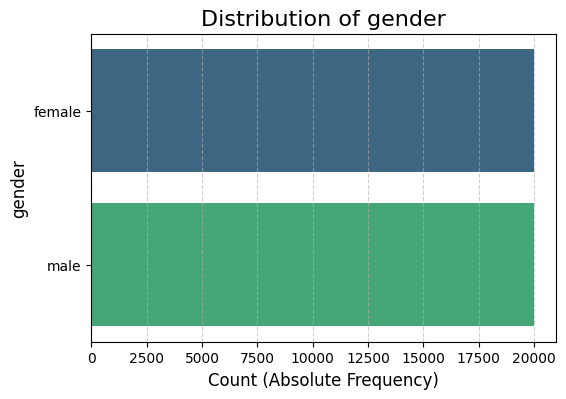

C:\Users\athar\AppData\Local\Temp\ipykernel_9352\3968175802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


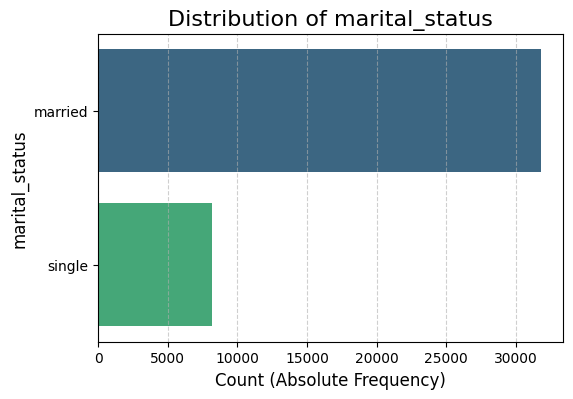

C:\Users\athar\AppData\Local\Temp\ipykernel_9352\3968175802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


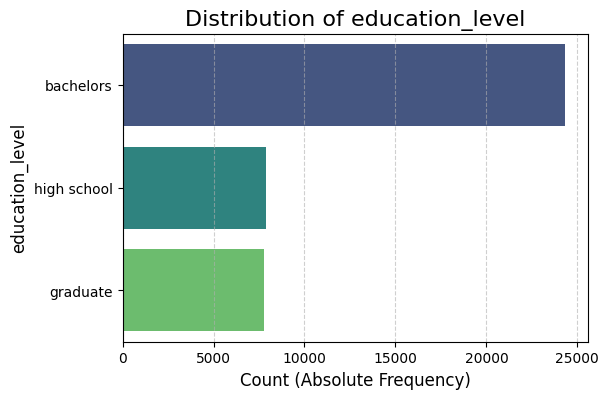

C:\Users\athar\AppData\Local\Temp\ipykernel_9352\3968175802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


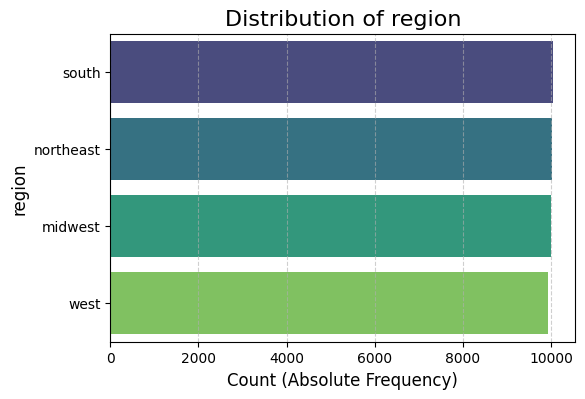

C:\Users\athar\AppData\Local\Temp\ipykernel_9352\3968175802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


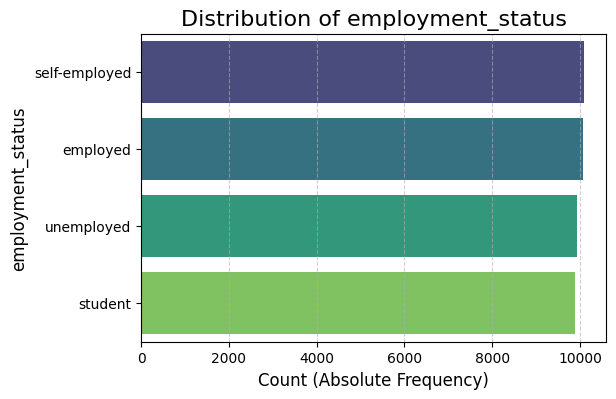

C:\Users\athar\AppData\Local\Temp\ipykernel_9352\3968175802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


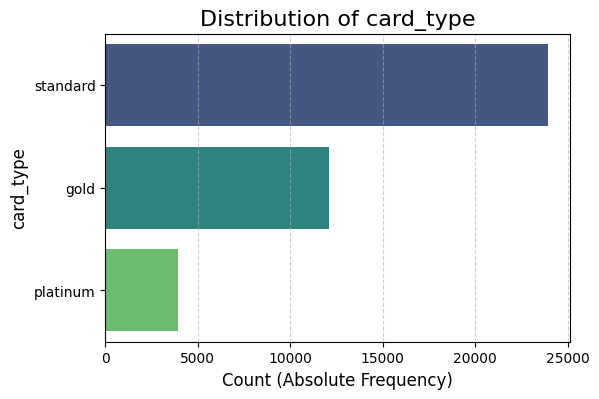

In [33]:
categorical_variables = data.select_dtypes('object').columns

# Loop through the list of column names (strings)
for variable in categorical_variables:
    # Pass the DataFrame and the column name string to the function
    bplot(data, variable)

# Submission Code

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('Datasets/analysis_data.csv')

missing_columns=['education_level','online_shopping_freq','utility_payment_count']

eda=data[missing_columns]

data['education_level'].fillna(data['education_level'].mode()[0],inplace=True)
data['online_shopping_freq'].fillna(data['online_shopping_freq'].median(),inplace=True)
data['utility_payment_count'].fillna(data['utility_payment_count'].median(),inplace=True)

data['credit_limit']=np.log(data['credit_limit'])
data['reward_points_balance']=np.log(data['reward_points_balance'])
data['num_transactions']=np.log(data['num_transactions']+1)
data['avg_transaction_value']=np.log(data['avg_transaction_value'])
data['travel_frequency']=np.log(data['travel_frequency']+1)
data['online_shopping_freq']=np.log(data['online_shopping_freq']+1)
data['utility_payment_count']=np.log(data['utility_payment_count']+1)

C:\Users\athar\AppData\Local\Temp\ipykernel_26476\2310938393.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education_level'].fillna(data['education_level'].mode()[0],inplace=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_26476\2310938393.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [3]:
variables=['owns_home',
 'has_auto_loan',
 'credit_score',
 'credit_limit',
 'tenure',
 'num_transactions',
 'avg_transaction_value',
 'online_shopping_freq',
 'reward_points_balance',
 'travel_frequency',
 'utility_payment_count',
 'num_children',
 'num_credit_cards',
 'gender',
 'marital_status',
 'education_level',
 'region',
 'employment_status',
 'card_type']


In [4]:
X_train = data[variables]
y = data.monthly_spend
categorical_variables=['gender','marital_status','education_level','region','employment_status','card_type']
X= pd.get_dummies(X_train, 
                         prefix_sep = '_', 
                         columns = categorical_variables, 
                         drop_first = True)

In [5]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)
model.predict(X)

array([1616.46990248, 2101.784591  , 1721.60556738, ..., 1593.80060318,
       1594.16480038, 1985.27799801])

In [18]:
# Evaluation
y_hat=model.predict(X)
check_file=pd.DataFrame({'monthly_spend_hat':y_hat})
check_file.to_csv('Evaluation/submission4.csv',index=False)

In [20]:
scoring_data = pd.read_csv('Datasets/scoring_data.csv')
scoring_data.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'education_level',
       'region', 'employment_status', 'owns_home', 'has_auto_loan',
       'annual_income', 'credit_score', 'credit_limit', 'tenure', 'card_type',
       'num_transactions', 'avg_transaction_value', 'online_shopping_freq',
       'reward_points_balance', 'travel_frequency', 'utility_payment_count',
       'num_children', 'num_credit_cards'],
      dtype='object')

In [9]:
scoring_data

,owns_home,has_auto_loan,credit_score,credit_limit,tenure,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards,gender,marital_status,education_level,region,employment_status,card_type
0,1,0,644.592407,8.747594,17,1.945910,3.479517,1.945910,8.380408,1.386294,1.791759,2,8,female,married,bachelors,west,self-employed,standard
1,0,1,683.032163,10.577320,14,2.890372,3.422810,2.944439,9.841127,2.079442,2.079442,3,8,male,married,high school,northeast,student,platinum
2,0,0,692.072705,9.291257,1,2.302585,3.585292,1.791759,8.635095,1.791759,0.693147,1,8,female,married,bachelors,northeast,self-employed,standard
3,0,1,735.600403,9.604649,2,2.564949,3.361546,2.484907,8.817701,0.693147,1.609438,3,8,female,married,bachelors,northeast,self-employed,gold
4,1,0,732.301374,9.977667,7,2.772589,2.514612,2.079442,9.121984,1.945910,0.000000,0,8,male,single,bachelors,midwest,self-employed,gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,594.183523,10.672864,9,3.637586,3.914768,2.772589,10.064561,1.609438,2.197225,2,8,male,married,graduate,south,student,gold
9996,0,0,667.283828,10.292067,8,3.091042,3.355084,2.639057,9.562763,1.945910,1.386294,3,8,female,married,bachelors,midwest,unemployed,gold
9997,0,1,676.018590,9.060887,17,2.197225,3.190320,2.302585,8.444767,1.386294,0.693147,1,8,male,married,bachelors,northeast,unemployed,standard
9998,1,0,711.554801,9.927174,6,2.484907,2.699723,2.639057,9.202023,1.386294,1.609438,0,8,male,single,high school,south,unemployed,gold


In [14]:
# PREDICTION
s_data = pd.read_csv('Datasets/scoring_data.csv')

variables=['owns_home',
 'has_auto_loan',
 'credit_score',
 'credit_limit',
 'tenure',
 'num_transactions',
 'avg_transaction_value',
 'online_shopping_freq',
 'reward_points_balance',
 'travel_frequency',
 'utility_payment_count',
 'num_children',
 'num_credit_cards',
 'gender',
 'marital_status',
 'education_level',
 'region',
 'employment_status',
 'card_type']

# Imputation
scoring_data=s_data[variables]

scoring_data['education_level'].fillna(data['education_level'].mode()[0],inplace=True)
scoring_data['online_shopping_freq'].fillna(data['online_shopping_freq'].median(),inplace=True)
scoring_data['utility_payment_count'].fillna(data['utility_payment_count'].median(),inplace=True)

# Transformations
scoring_data['credit_limit']=np.log(scoring_data['credit_limit'])
scoring_data['reward_points_balance']=np.log(scoring_data['reward_points_balance'])
scoring_data['num_transactions']=np.log(scoring_data['num_transactions']+1)
scoring_data['avg_transaction_value']=np.log(scoring_data['avg_transaction_value'])
scoring_data['travel_frequency']=np.log(scoring_data['travel_frequency']+1)
scoring_data['online_shopping_freq']=np.log(scoring_data['online_shopping_freq']+1)
scoring_data['utility_payment_count']=np.log(scoring_data['utility_payment_count']+1)

X_test = pd.get_dummies(scoring_data, 
                         prefix_sep = '_', 
                         columns = categorical_variables, 
                         drop_first = True)

pred = model.predict(X_test)

C:\Users\athar\AppData\Local\Temp\ipykernel_26476\1176199878.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scoring_data['education_level'].fillna(data['education_level'].mode()[0],inplace=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_26476\1176199878.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scoring_data['education_level'

In [15]:
submission_file = pd.DataFrame({'customer_id': s_data.customer_id, 'monthly_spend': pred})
submission_file.to_csv('Submissions/submission_file_4.csv',index = False)